# [Goulib](../notebook.ipynb).colors
color toolbox


In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999; // to avoid a scrollbar in Pantone table below

<IPython.core.display.Javascript object>

In [2]:
%matplotlib notebook 
import matplotlib.pyplot as plt

In [3]:
from Goulib.notebook import *
from Goulib.colors import *

## Color objects

In [4]:
red=Color('red') #Color objects can be init'ed by a name (as in matplotlib or html)
green=Color('#00ff00') # by RGB hex string,
blue=Color((0,0,1)) # by RGB triplet

cmyk=Color((.45,.12,.67,.05),'cmyk') # or by specifying the colorspace used
lab=Color((47.0, 68.0, 45.0),'Lab')

In [5]:
print(red,green,blue,cmyk,lab) #colors automagically recieve a name and have an HTML representation

In [6]:
from random import random
r=[Color((random(),random(),random())) for _ in range(10)]
print(*r) # unknown colors recieve name of the nearest known color with a tile before

In [7]:
#colors can be added
cyan=blue+green
magenta=blue+red
yellow=red+green
print(cyan, magenta, yellow) # see ? the names of calculated colors are correct !

In [8]:
magenta-cyan-yellow #colors can be substracted too

Color('black')

In [9]:
-cmyk # unary minus gives the complementary color

Color('~darkviolet')

In [10]:
c= Color('gray')-red # colors can be substracted too. 
print(c,c.hex) # notice RGB values were bounded

## Colorspaces and conversion

In [18]:
# Colors can be initialized and converted to-from any of the following colorspaces
colorspaces

('XYZ', 'xyY', 'Lab', 'HSV', 'CMYK', 'RGB', 'HEX')

In [24]:
#each Color keeps track of the colorspace used at construction
print(blue.space,red.space,cmyk.space,lab.space) 

In [21]:
for s in colorspaces:
    print(s,'=',red.convert(s))

<IPython.core.display.Javascript object>


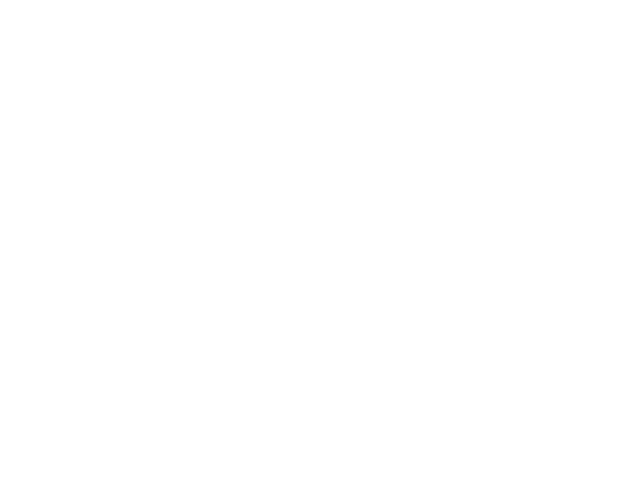

<IPython.core.display.Javascript object>


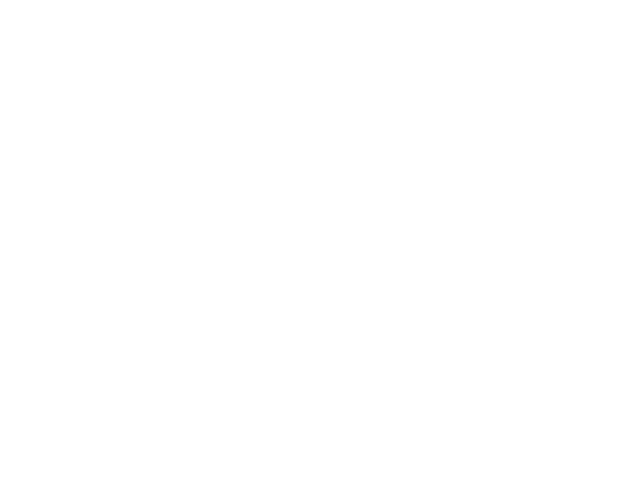

In [25]:
converters

## Color ranges

In [12]:
print(color_range(12,'red','blue')) # ranges are generated in by linear interpolation in 'hsv' by default

In [13]:
print(color_range(12,'red','blue','xyz')) # but another colorspace can be specified

## Standard color tables

In [48]:
# several dictionaries of standard  colors are predefined:
print('color contains',len(color),'web colors indexed by name :',color['blue'])
print('color_lookup contains',len(color_lookup),'web colors indexed by hex :',color_lookup['#808000'])
print('acadcolors contains',len(acadcolors),'Autocad ACI colors indexed by int :',acadcolors[0:16])
print('pantone contains',len(pantone),'Pantone colors indexed by name :',pantone['1795C'])

In [62]:
def ColorTable(colors,key,width=10):
    from Goulib.table import Table, Cell
    from Goulib.itertools2 import reshape
    
    def tooltip(c):
        return '\n'.join('%s = %s'%(k,v) for k,v in c._values.items())

    labels=(color['black'],color['white']) #possible colors for labels
    t=[]
    for c in sorted(colors.values(),key=key):
        c2=nearest_color(c,labels,opt=max) #chose the label color with max difference to pantone color
        s='<span title="%s" style="color:%s">%s</span>'%(tooltip(c),c2.hex,c.name)
        t.append(Cell(s,style={'background-color':c.hex}))
    return Table(reshape(t,(0,width)))

ColorTable(pantone,lambda c:int(c.name[:-1]),20)

100C,101C,102C,103C,104C,105C,106C,107C,108C,109C,110C,111C,112C,113C,114C,115C,116C,117C,118C,119C
120C,121C,122C,123C,124C,125C,126C,127C,128C,129C,130C,131C,132C,133C,134C,135C,136C,137C,138C,139C
140C,141C,142C,143C,144C,145C,146C,147C,148C,149C,150C,151C,152C,153C,154C,155C,156C,157C,158C,159C
160C,161C,162C,163C,164C,165C,166C,167C,168C,169C,170C,171C,172C,173C,174C,175C,176C,177C,178C,179C
180C,181C,182C,183C,184C,185C,186C,187C,188C,189C,190C,191C,192C,193C,194C,196C,197C,198C,199C,200C
201C,202C,203C,204C,205C,206C,207C,208C,209C,210C,211C,212C,213C,214C,215C,216C,217C,218C,219C,220C
221C,222C,223C,224C,225C,226C,227C,228C,229C,230C,231C,232C,233C,234C,235C,236C,237C,238C,239C,240C
241C,242C,243C,244C,245C,246C,247C,248C,249C,250C,251C,252C,253C,254C,255C,256C,257C,258C,259C,260C
261C,262C,263C,264C,265C,266C,267C,268C,269C,270C,271C,272C,273C,274C,275C,276C,277C,278C,279C,280C
281C,282C,283C,284C,285C,286C,287C,288C,289C,290C,291C,292C,293C,294C,295C,296C,297C,298C,299C,300C
301C,302C,303C,304C,305C,306C,307C,308C,309C,310C,311C,312C,313C,314C,315C,316C,317C,318C,319C,320C


In [ ]:
def ColorCube(colors,s=50):
    """draw an interactive Lab color cube of colors"""
    x,y,z,c,l=[],[],[],[],[]
    for id in colors:
        p=colors[id]
        x.append(p.luv[1])
        y.append(p.luv[2])
        z.append(p.luv[0])
        c.append(p.hex)
        l.append(p.name)
    fig = plt.figure()
    from mpl_toolkits.mplot3d import Axes3D
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(x,y,z,c=c,s=s,lw=0,depthshade=False)
    ax.set_xlabel('u')
    ax.set_ylabel('v')
    ax.set_zlabel('L')
    plt.show()

In [ ]:
LabCube(pantone)

## Pantone colors

In [ ]:
# pantone is a dict of Colors initialized from Lab values
bred=pantone['1795C'] #BOBST Red
bred2=Color(bred.hex) #the corresponding RGB color
print(bred,bred2,deltaE(bred,bred2))
bred.lab

In [ ]:
p=nearest_color(cmyk,pantone) # find best matching Pantone color
print(p,cmyk,deltaE(p,cmyk))

In [ ]:

    
plt.scatter(x,y,s=z,color=c) #already cool

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x,y,z,c=c,s=100,lw=0,depthshade=False)

In [ ]:
import mpld3 #much cooler !
fig, ax = plt.subplots()
scatter = ax.scatter(x,y,c=c,lw=0,s=z)
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=l)
mpld3.plugins.connect(fig, tooltip)
mpld3.display()
